In [1]:
import pandas as pd
import ast
from matplotlib.lines import Line2D

In [2]:
from ogb.graphproppred import GraphPropPredDataset

dataset = GraphPropPredDataset(name = "ogbg-molpcba")

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]

graph, label = dataset[349519]

In [3]:
num_nodes_list = [(i, dataset[i][0]['num_nodes']) for i in range(len(dataset))]

num_nodes_list.sort(key=lambda x: x[1], reverse=True)

top_5_graphs = num_nodes_list[:120]

for idx, num_nodes in top_5_graphs:
    print(f"Graph index: {idx}, Number of nodes: {num_nodes}")

Graph index: 349519, Number of nodes: 332
Graph index: 17365, Number of nodes: 331
Graph index: 302589, Number of nodes: 322
Graph index: 346969, Number of nodes: 313
Graph index: 182987, Number of nodes: 311
Graph index: 390365, Number of nodes: 309
Graph index: 349517, Number of nodes: 304
Graph index: 104782, Number of nodes: 303
Graph index: 17363, Number of nodes: 302
Graph index: 272369, Number of nodes: 302
Graph index: 274645, Number of nodes: 302
Graph index: 363468, Number of nodes: 301
Graph index: 296001, Number of nodes: 300
Graph index: 349523, Number of nodes: 300
Graph index: 272370, Number of nodes: 294
Graph index: 37503, Number of nodes: 290
Graph index: 46677, Number of nodes: 287
Graph index: 321265, Number of nodes: 285
Graph index: 17368, Number of nodes: 284
Graph index: 200269, Number of nodes: 284
Graph index: 351095, Number of nodes: 283
Graph index: 403909, Number of nodes: 281
Graph index: 389796, Number of nodes: 277
Graph index: 361070, Number of nodes: 2

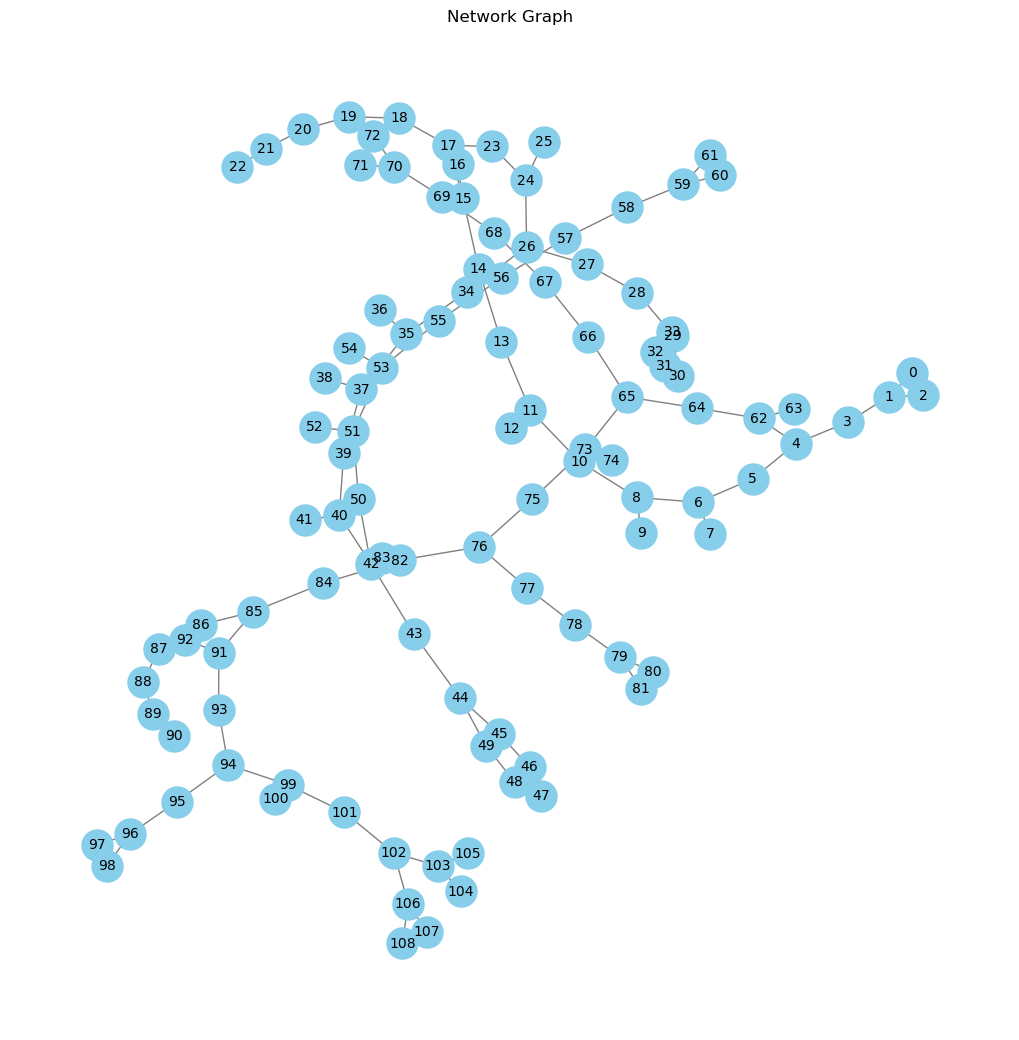

In [4]:
graph, _ = dataset[135257]
import networkx as nx
import matplotlib.pyplot as plt

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Network Graph")
plt.show()

In [5]:
graph, label = dataset[182987] 

In [6]:
edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

In [7]:
results = pd.read_csv('subgroups_graph_182987_OGBG-MolHIV.csv')

In [8]:
results

,Unnamed: 0,Prototype,Rho,Sigma,Q,Ranks
0,202,202,14,5,0.230508,"[(202, False), (201, True), (203, True), (204,..."
1,272,272,13,5,0.228987,"[(272, False), (274, True), (273, True), (264,..."
2,237,237,13,5,0.228987,"[(237, False), (239, True), (238, True), (4, F..."
3,159,159,19,4,0.217341,"[(159, False), (158, False), (160, False), (15..."
4,259,259,11,7,0.207201,"[(259, True), (257, False), (260, False), (261..."
5,247,247,11,7,0.207201,"[(247, True), (245, False), (248, False), (249..."
6,138,138,11,7,0.207201,"[(138, True), (139, False), (137, False), (135..."
7,60,60,11,7,0.207201,"[(60, True), (61, False), (59, False), (57, Fa..."
8,268,268,5,3,0.206559,"[(268, True), (269, False), (267, False), (270..."
9,35,35,5,3,0.206559,"[(35, True), (36, False), (34, False), (37, Tr..."


In [9]:
graph_list = [182987, 135257, 200289, 104795]

prototypes = [159, 272]

reference_groups = {
    159: [159, 158, 160, 156, 163, 162, 161, 164, 155, 157],
    272: [272, 274, 273, 264, 263, 265, 275, 278, 261, 279, 266, 276, 277]
}
subgroups = {
    159: [159, 158, 160, 156],
    272: [272, 274, 273, 264, 263]
}

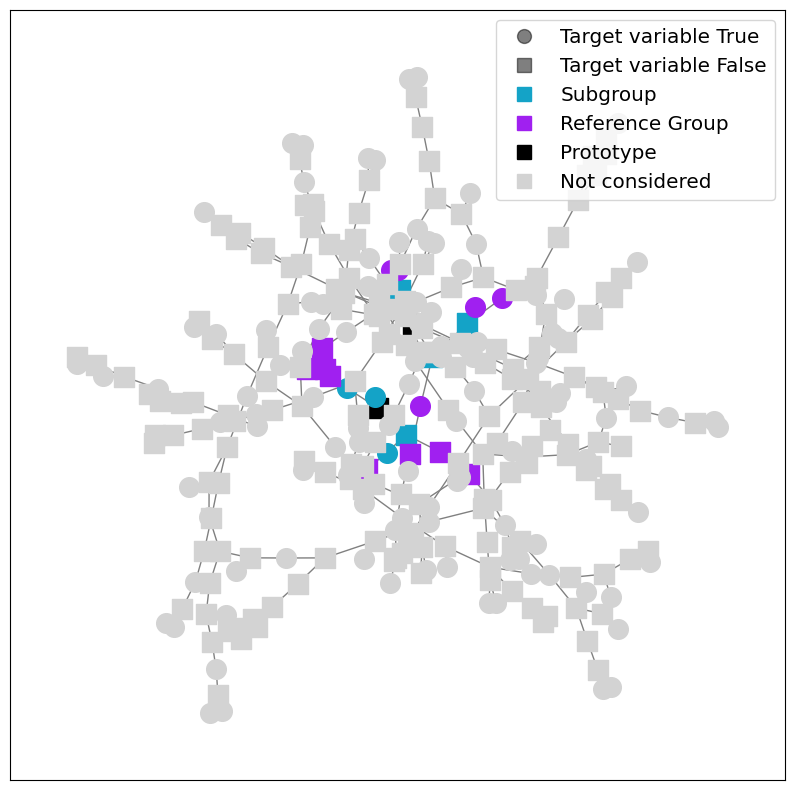

In [10]:
def get_node_status(node, prototype):
    index_prototype = results[results['Unnamed: 0'] == prototype].index[0]
    ranks_list = ast.literal_eval(results['Ranks'][index_prototype])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
the_rest_nodes = set(G.nodes())

for prototype in prototypes:
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    the_rest_nodes -= set(reference_groups[prototype])
    the_rest_nodes -= {prototype}

the_rest_group_nodes_true = [node for node in the_rest_nodes if get_node_status(node, prototype)]
the_rest_group_nodes_false = [node for node in the_rest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
the_rest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, the_rest_marker], loc='upper right', fontsize='x-large')

plt.show()

In [11]:
results = pd.read_csv('subgroups_graph_135257_OGBG-MolHIV.csv')
results

,Unnamed: 0,Prototype,Rho,Sigma,Q,Ranks
0,95,95,10,3,0.273861,"[(95, False), (94, False), (96, False), (97, T..."
1,94,94,13,3,0.221716,"[(94, False), (95, False), (99, False), (93, T..."
2,30,30,5,3,0.206559,"[(30, True), (31, False), (29, False), (32, Tr..."
3,69,69,5,3,0.206559,"[(69, True), (70, False), (68, False), (71, Tr..."
4,58,58,5,3,0.206559,"[(58, True), (59, False), (57, False), (60, Tr..."
5,14,14,9,4,0.203704,"[(14, True), (15, False), (13, False), (11, Fa..."
6,50,50,21,10,0.180731,"[(50, True), (51, False), (42, False), (40, Fa..."
7,75,75,10,7,0.179284,"[(75, True), (73, False), (76, False), (82, Fa..."
8,78,78,5,4,0.178885,"[(78, False), (77, False), (79, False), (76, F..."
9,52,52,23,5,0.158120,"[(52, True), (51, False), (50, True), (53, Fal..."


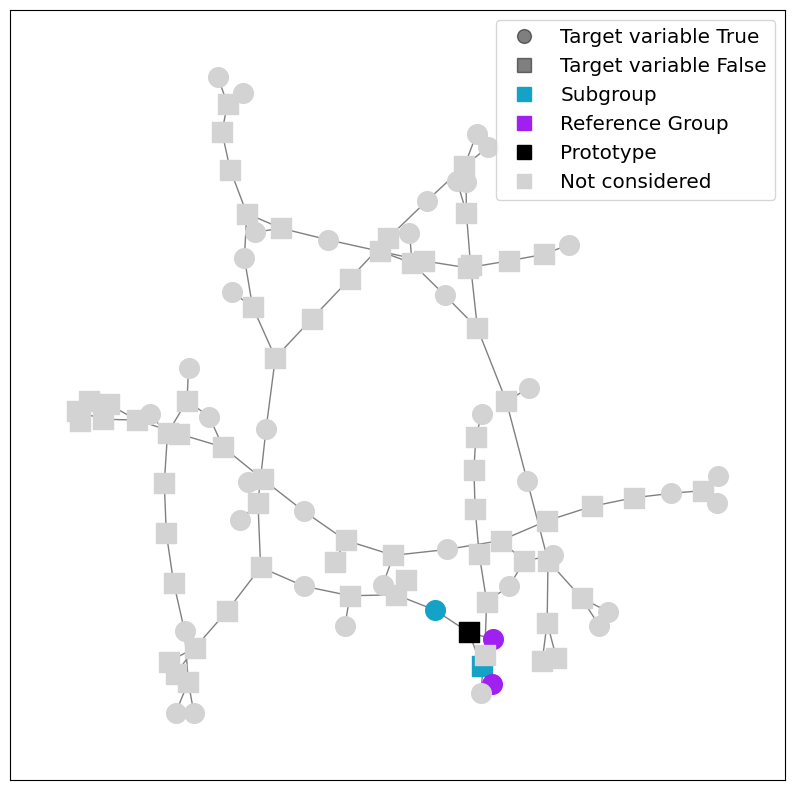

In [12]:
graph, label = dataset[135257]

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_135257_OGBG-MolHIV.csv')

prototypes = [11, 58]

reference_groups = {
    11: [11, 10, 13, 12, 14],
    58: [58, 59, 57, 60, 61]
}
subgroups = {
    11: [11, 10, 13],
    58: [58, 59, 57]
}

def get_node_status(node, prototype):
    ranks_list = ast.literal_eval(results.loc[prototype, 'Ranks'])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status
    return None

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
the_rest_nodes = set(G.nodes())

for prototype in prototypes:
    if prototype not in results.index:
        continue
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    the_rest_nodes -= set(reference_groups[prototype])
    the_rest_nodes -= {prototype}

valid_prototypes = [p for p in prototypes if p in results.index]
last_prototype = valid_prototypes[-1]

the_rest_group_nodes_true = [node for node in the_rest_nodes if get_node_status(node, last_prototype)]
the_rest_group_nodes_false = [node for node in the_rest_nodes if not get_node_status(node, last_prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
the_rest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, the_rest_marker], loc='upper right', fontsize='x-large')

plt.show()

In [13]:
results = pd.read_csv('subgroups_graph_200289_OGBG-MolHIV.csv')
results

,Unnamed: 0,Prototype,Rho,Sigma,Q,Ranks
0,29,29,7,4,0.323970,"[(29, False), (30, False), (28, False), (27, F..."
1,27,27,7,4,0.323970,"[(27, False), (26, False), (28, False), (29, F..."
2,9,9,9,6,0.226805,"[(9, True), (10, False), (38, False), (8, Fals..."
3,20,20,15,8,0.200832,"[(20, False), (37, False), (21, False), (19, T..."
4,11,11,8,4,0.176777,"[(11, True), (12, False), (10, False), (13, Fa..."
5,39,39,10,3,0.146059,"[(39, True), (38, False), (9, True), (37, Fals..."
6,24,24,22,12,0.145472,"[(24, True), (23, False), (25, True), (22, Fal..."
7,37,37,19,4,0.144894,"[(37, False), (20, False), (38, False), (36, F..."
8,10,10,5,4,0.134164,"[(10, False), (9, True), (19, True), (11, True..."
9,0,0,9,3,0.128300,"[(0, False), (1, True), (2, False), (3, False)..."


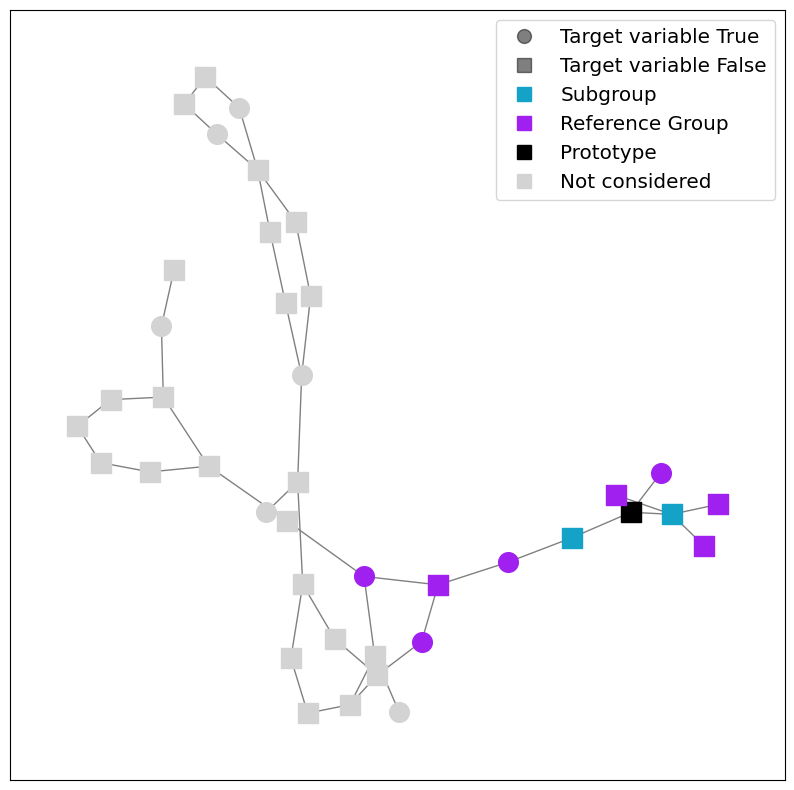

In [14]:
graph, label = dataset[200289]

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_200289_OGBG-MolHIV.csv')

prototypes = [29, 13]

reference_groups = {
    29: [29, 30, 28, 27, 25, 31, 34],
    13: [13, 15, 12, 14, 16, 17, 18, 11, 10, 9, 19]
}
subgroups = {
    29: [29, 30, 28, 27],
    13: [13, 15, 12]
}

def get_node_status(node, prototype):
    ranks_list = ast.literal_eval(results.loc[prototype, 'Ranks'])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status
    return None

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
the_rest_nodes = set(G.nodes())

for prototype in prototypes:
    if prototype not in results.index:
        continue
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    the_rest_nodes -= set(reference_groups[prototype])
    the_rest_nodes -= {prototype}

valid_prototypes = [p for p in prototypes if p in results.index]
last_prototype = valid_prototypes[-1]

the_rest_group_nodes_true = [node for node in the_rest_nodes if get_node_status(node, last_prototype)]
the_rest_group_nodes_false = [node for node in the_rest_nodes if not get_node_status(node, last_prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
the_rest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, the_rest_marker], loc='upper right', fontsize='x-large')

plt.show()

In [15]:
results = pd.read_csv('subgroups_graph_104795_OGBG-MolHIV.csv')
results

,Unnamed: 0,Prototype,Rho,Sigma,Q,Ranks
0,89,89,11,5,0.232905,"[(89, True), (87, False), (90, False), (94, Fa..."
1,56,56,16,10,0.207524,"[(56, True), (57, True), (55, False), (58, Fal..."
2,113,113,11,7,0.207201,"[(113, True), (111, False), (114, False), (117..."
3,199,199,11,7,0.207201,"[(199, True), (197, False), (200, False), (201..."
4,219,219,11,7,0.207201,"[(219, True), (217, False), (220, False), (223..."
5,167,167,21,12,0.206981,"[(167, False), (169, True), (168, True), (162,..."
6,55,55,5,3,0.206559,"[(55, False), (54, False), (56, True), (96, Tr..."
7,29,29,5,3,0.206559,"[(29, True), (30, False), (28, False), (31, Tr..."
8,140,140,9,4,0.203704,"[(140, True), (138, False), (141, False), (142..."
9,96,96,15,5,0.192450,"[(96, True), (94, False), (54, False), (52, Fa..."


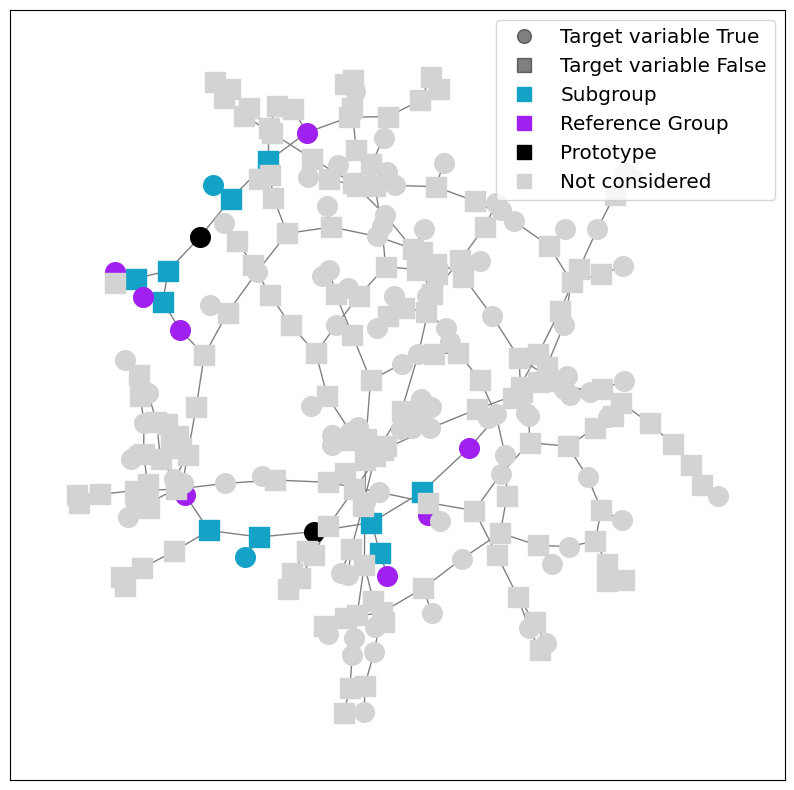

In [16]:
graph, label = dataset[104795]

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_104795_OGBG-MolHIV.csv')

prototypes = [199, 113]

reference_groups = {
    199: [199, 197, 200, 198, 201, 254, 196, 203, 192, 202, 256],
    113: [113, 111, 114, 112, 117, 115, 106, 105, 119, 118, 116]
}
subgroups = {
    199: [199, 197, 200, 198, 201, 254, 196],
    113: [113, 111, 114, 112, 117, 115, 106]
}

def get_node_status(node, prototype):
    index_prototype = results[results['Unnamed: 0'] == prototype].index[0]
    ranks_list = ast.literal_eval(results['Ranks'][index_prototype])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
the_rest_nodes = set(G.nodes())

for prototype in prototypes:
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    the_rest_nodes -= set(reference_groups[prototype])
    the_rest_nodes -= {prototype}

the_rest_group_nodes_true = [node for node in the_rest_nodes if get_node_status(node, prototype)]
the_rest_group_nodes_false = [node for node in the_rest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
the_rest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, the_rest_marker], loc='upper right', fontsize='x-large')

plt.show()